In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

**Экспоненциальное распределенение**

Сгенерируем выборку из 1000 наблюдений для экспоненциального распределения с параметром lambda = 4

из документации:
sts.expon(loc, scale): 
 - loc (мат.ожидание) = lambda ** (-1)
 - scale (среднеквадратичное отклонение). т.к. дисперсия = lambda ** (-2) => scale = lambda ** (-1)
 
следовательно, loc=scale

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


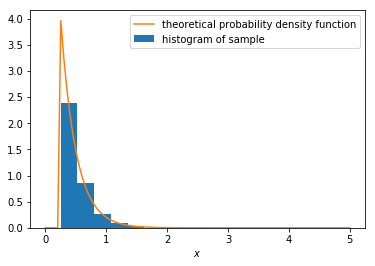

In [2]:
lamb = 4
sc = lamb**(-1)
exp = sts.expon(loc = sc, scale = sc)
sample = exp.rvs(1000)

# построим гистограмму по сгенерированной выборке
plt.hist(sample, normed=True, label='histogram of sample')
plt.xlabel('$x$')

# построим теоретический график функции плотности вероятности для показательного распределения
x = np.linspace(0,5,100)
pdf = exp.pdf(x)
plt.plot(x, pdf, label='theoretical probability density function')
plt.legend(loc='upper right')
plt.show()

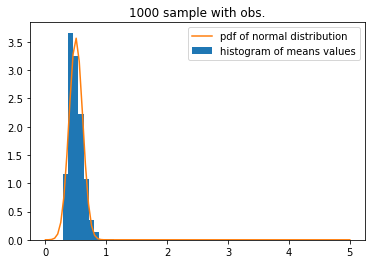

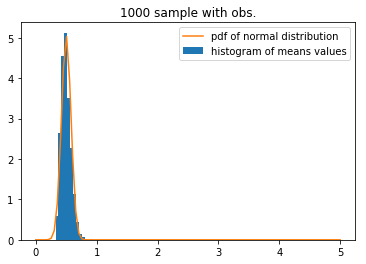

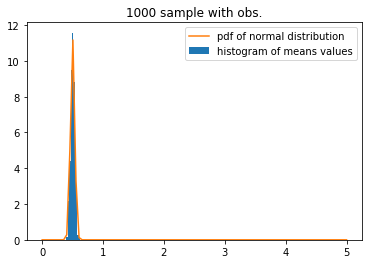

In [3]:
# генерируем 1000 выборок с n наблюдениями -> рассчитываем среднее в каждой выборке -> строим гистограмму

for n in [5, 10, 50]:
    means=[]
    for i in range (0,1001):
        sample_n = exp.rvs(n)
        means.append(sum(sample_n)/n)
    plt.hist(means, normed=True, label='histogram of means values')
    # построим нормальное распределение со значениями параметров, как у рассматриваемого показательного распределения
    loc = np.sqrt(sc)
    variance = np.sqrt(sc**2/n)
    norm_sample = sts.norm.pdf(x , loc, variance)
    plt.plot(x, norm_sample, label='pdf of normal distribution')
    plt.legend()
    plt.title("1000 sample with obs.")
    plt.show()

    